# 2.Visualisation for EDA: Charts & Plots
Visualisation helps Data scientists to convey their results in a simplified way to a lay man or whichever is the target audience

We will cover the following topics in upcoming section
1. Line chart
2. Bar chart
3. Scatter plot
4. Area plot and stacked plot
5. Pie chart
6. Table chart
7. Polar chart
8. Histogram
9. Lollipop chart
10. Choosing the best chart

####2.1 Line Chart
A line chart is used to illustrate the relationship between two or more continuous variables.

We are going to use the matplotlib library and the stock price data to plot time series
lines. First of all, let's understand the dataset. We have used Python library to generate the dataset. It is the simplest possible dataset you can imagine,
with just two columns. The first column is Date and the second column is Price,
indicating the stock price on that date.

In [ ]:
#Generating Random Data
!pip3 install radar
import datetime
import math
import pandas as pd
import random 
import radar 

def generateData(n): 
  listdata = [] 
  start = datetime.datetime(2019, 8, 1) 
  end = datetime.datetime(2019, 8, 30) 
  delta = end - start 
  for _ in range(n):
    date = radar.random_datetime(start='2019-08-1', stop='2019-08-30').strftime("%Y-%m-%d")
    price = round(random.uniform(900, 1000), 4)
    listdata.append([date, price])
  df = pd.DataFrame(listdata, columns = ['Date', 'Price']) 
  df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
  df = df.groupby(by='Date').mean()
  return df

df = generateData(50)
df.head(10)

  Created wheel for radar: filename=radar-0.3-py3-none-any.whl size=5008 sha256=4257e3d3ce76f1a06592f711c43b37526dd08ee4744a52abd3caa4d78ccd2a88
  Stored in directory: /root/.cache/pip/wheels/0f/0d/e2/485812e62630be293d1394ef6ea6fdbfa9058455a4c443be16
Successfully built radar


,Price
Date,
2019-08-01,971.587300
2019-08-02,968.604175
2019-08-03,947.558333
2019-08-04,935.753800
2019-08-05,973.899200
2019-08-07,943.197467
2019-08-09,968.376400
2019-08-10,967.926000
2019-08-11,932.849533


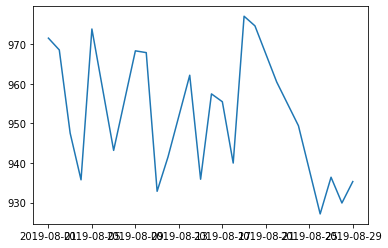

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df) 
plt.show()

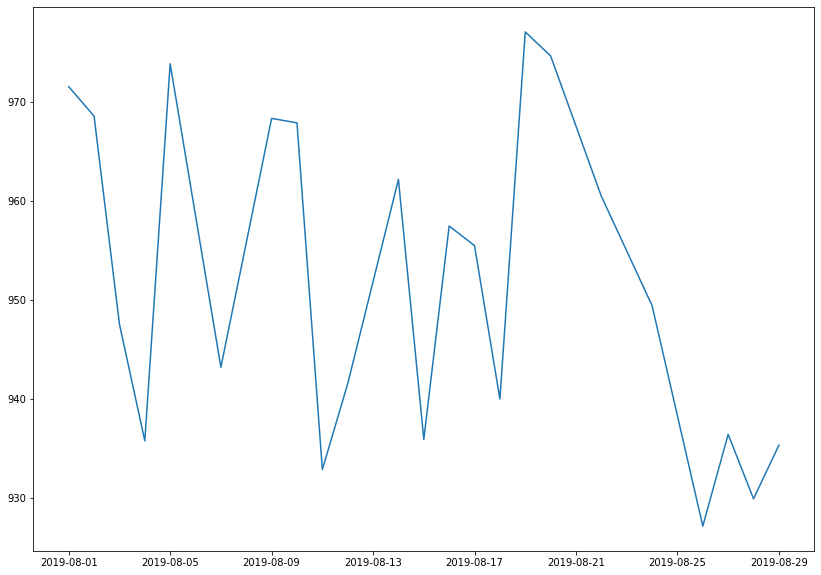

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 10)
plt.plot(df)

In the preceding example, we assume the data is available in the CSV format. In real-life
scenarios, the data is mostly available in CSV, JSON, Excel, or XML formats and is mostly
fetched through some standard API.

####2.2 Bar Chart
Bars can be drawn horizontally or vertically to represent categorical variables.Bar charts are frequently used to distinguish objects between distinct collections in order to track variations over time.In most cases, bar charts are very convenient when the changes are large. 

Let's assume a pharmacy in Norway keeps track
of the amount of Zoloft sold every month. Zoloft is a medicine prescribed to patients
suffering from depression. We can use the calendar Python library to keep track of the
months of the year (1 to 12) corresponding to January to December

In [ ]:
#Importing required libraries
import numpy as np
import calendar
import matplotlib.pyplot as plt

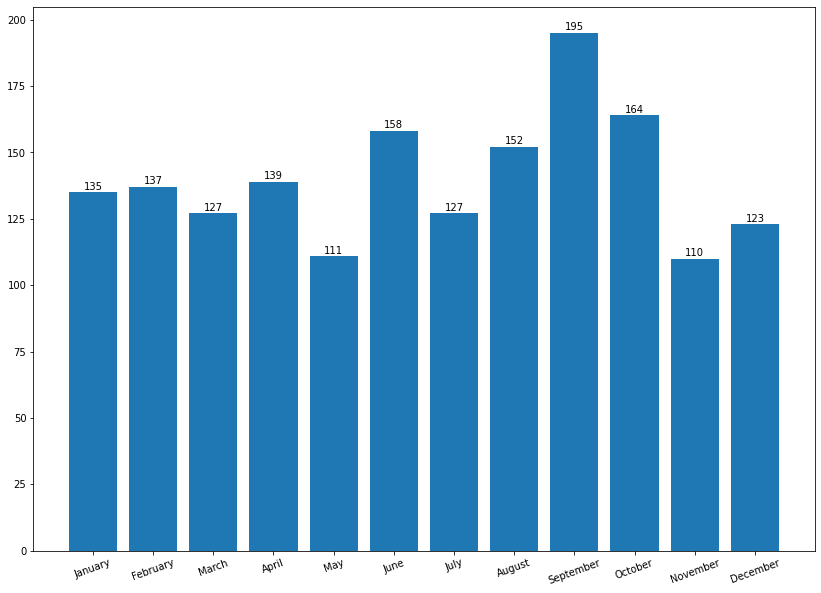

In [ ]:
#Remember, the range stopping parameter is exclusive, meaning 
# if you generate range from (1, 13), the last item, 13, is not included
months = list(range(1, 13))
sold_quantity = [round(random.uniform(100, 200)) for x in range(1, 13)]

#Specify the layout of the figure and allocate space
figure, axis = plt.subplots()

#In the x axis, we would like to display the names of the months
plt.xticks(months, calendar.month_name[1:13], rotation=20) 
plot = axis.bar(months, sold_quantity) 

for rectangle in plot:
  height = rectangle.get_height()
  axis.text(rectangle.get_x() + rectangle.get_width() /2., 1.002 * height, '%d' % int(height), ha='center', va = 'bottom')

plt.show()

Here are important observations from the preceding visualizations:
* months and sold_quantity are Python lists representing the amount of Zoloft
sold every month.
* We are using the subplots() method in the preceding code as it
provides a way to define the layout of the figure in terms of the number of
graphs and provides ways to organize them.
* In step 3, we use the plt.xticks() function, which allows us to change the
x axis tickers from 1 to 12, where calender.months[1:13] changes this
numerical format into corresponding months from the calendar Python library.
* Step 4 actually prints the bar with months and quantity sold.
ax.text() within the for loop annotates each bar with its corresponding
values. We plotted these values by getting
the x and y coordinates and then adding bar_width/2 to the x coordinates with
a height of 1.002, which is the y coordinate. Then, using the va and ha
arguments, we align the text centrally over the bar.
* Step 6  displays the graph on the screen.


As mentioned earlier that bars can be either horizontal
or vertical. We can change it to a horizontal format. 
All the code remains the same,
except plt.xticks changes to plt.yticks() and plt.bar() changes to plt.barh().


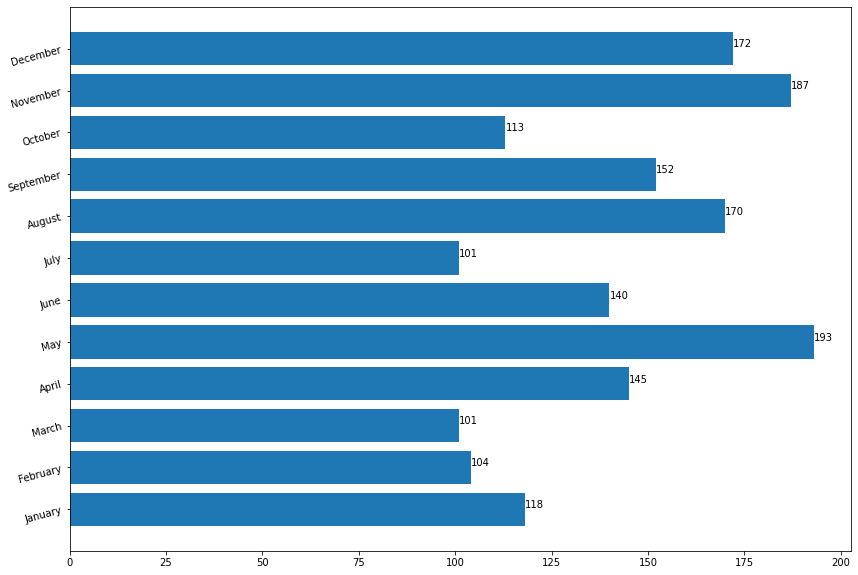

In [ ]:
months = list(range(1, 13))
sold_quantity = [round(random.uniform(100, 200)) for x in range(1, 13)]
figure, axis = plt.subplots()
plt.yticks(months, calendar.month_name[1:13], rotation=15)
plot = axis.barh(months, sold_quantity)
for rectangle in plot: 
  width = rectangle.get_width() 
  axis.text(width + 2.5, rectangle.get_y() + 0.38, '%d' % int(width), ha='center', va = 'bottom')
plt.show()

####2.3 Scatter Plot
Scatter plots are also called scatter graphs, scatter charts, scattergrams, and scatter diagrams. They use a Cartesian coordinates system to display values of typically two variables for a set of data.

Scatter plot comes handy in following scenarios
* When one continuous variable is dependent on another variable
* When both continuous variables are independent



There are two important concepts—independent variable and dependent variable. In
statistical modeling or mathematical modeling, the values of dependent variables rely on
the values of independent variables. The dependent variable is the outcome variable being
studied. The independent variables are also referred to as regressors. The takeaway
message here is that scatter plots are used when we need to show the relationship between
two variables, and hence are sometimes referred to as correlation plots.

Some examples in which scatter plots are suitable are as follows:
* Research studies have successfully established that the number of hours of sleep
required by a person depends on the age of the person.
* The average income for adults is based on the number of years of education.

In [ ]:
# Scatter Plot Example Sleep vs Age of Person - Reference Book Hands on Exploratory Data Analysis with Python
headers_cols = ['age','min_recommended', 'max_recommended', 'may_be_appropriate_min', 'may_be_appropriate_max', 'min_not_recommended', 'max_not_recommended'] 
url='https://drive.google.com/uc?id=14Pwz9kMH1Wwq3B7qj9aVLagU5trVuj98'
sleepDf = pd.read_csv(url, usecols=headers_cols)
sleepDf.head(10)


,age,min_recommended,max_recommended,may_be_appropriate_min,may_be_appropriate_max,min_not_recommended,max_not_recommended
0,0,14,17,11,13,11,19
1,1,14,17,11,13,11,19
2,2,14,17,11,13,11,19
3,3,14,17,11,13,11,19
4,4,12,15,10,11,10,18
5,5,12,15,10,11,10,18
6,6,12,15,10,11,10,18
7,7,12,15,10,11,10,18
8,8,12,15,10,11,10,18
9,9,12,15,10,11,10,18


Having imported the dataset correctly, let's display a scatter plot. We start by importing the
required libraries and then plotting the actual graph. Next, we display the x-label and the ylabel.

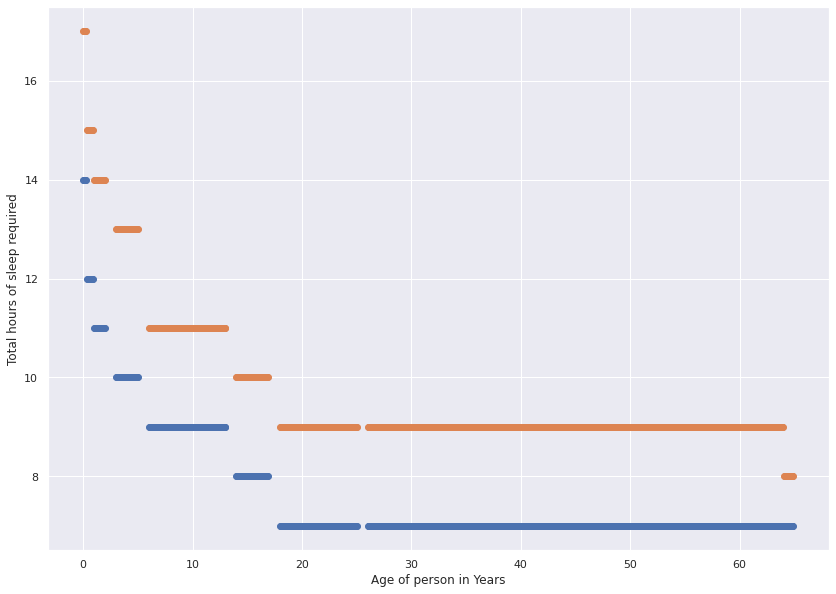

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# A regular scatter plot
plt.scatter(x=sleepDf["age"]/12., y=sleepDf["min_recommended"])
plt.scatter(x=sleepDf["age"]/12., y=sleepDf['max_recommended'])
plt.xlabel('Age of person in Years')
plt.ylabel('Total hours of sleep required')
plt.show()

We can explicitly
see that the total number of hours of sleep required by a person is high initially and
gradually decreases as age increases. The resulting graph is interpretable, but due to the
lack of a continuous line, the results are not self-explanatory. Let's fit a line to it and see if
that explains the results in a more obvious way:

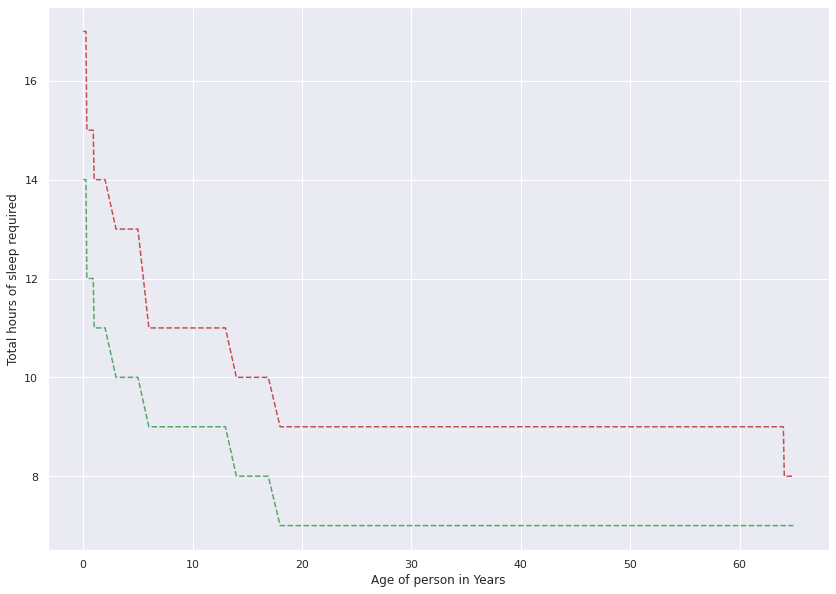

In [ ]:
# Line plot
plt.plot(sleepDf['age']/12., sleepDf['min_recommended'], 'g--')
plt.plot(sleepDf['age']/12., sleepDf['max_recommended'], 'r--')
plt.xlabel('Age of person in Years')
plt.ylabel('Total hours of sleep required')
plt.show()

From the graph, it is clear that the two lines decline as the age increases. It shows that newborns between 0 and 3 months require at least 14-17 hours of sleep every day. Meanwhile, adults and the elderly require 7-9 hours of sleep every day.

Let's take another example of a scatter plot using the most popular dataset used in data
science—the Iris dataset. The dataset was introduced by Ronald Fisher in 1936 and is
widely adopted by bloggers, books, articles, and research papers to demonstrate various
aspects of data science and data mining. The dataset holds 50 examples each of three
different species of Iris, named setosa, virginica, and versicolor. Each example has four
different attributes: petal_length, petal_width, sepal_length, and sepal_width.
The dataset can be loaded in several ways.

In [ ]:
#Import seaborn and set some default parameters of matplotlib:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 150

In [ ]:
#Use style from seaborn
sns.set() 

In [ ]:
#Load Dataset & Create a regular scatter plot

df = sns.load_dataset('iris')
df['species'] = df['species'].map({'setosa': 0, "versicolor": 1, "virginica": 2})

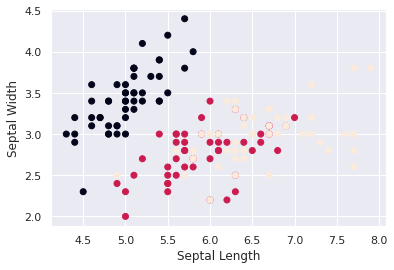

In [ ]:
#Create the labels for the axes
plt.xlabel('Septal Length')
plt.ylabel('Septal Width')
plt.scatter(x=df["sepal_length"], y=df["sepal_width"], c = df.species)

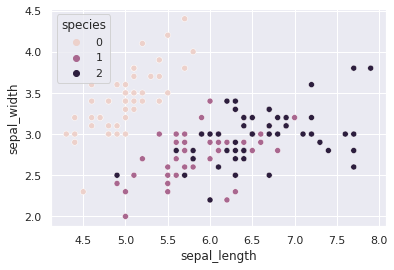

In [ ]:
"""
A scatter plot can also be generated using the seaborn library. Seaborn makes the graph visually better. 
We can illustrate the relationship between x and y for distinct subsets of the data by utilizing the size,
style, and hue parameters of the scatter plot in seaborn.
"""
sns.scatterplot(x=df["sepal_length"], y=df["sepal_width"], hue=df.species, data=df)

####2.4 Bubble chart

A bubble plot is a manifestation of the scatter plot where each data point on the graph is
shown as a bubble. Each bubble can be illustrated with a different color, size, and
appearance.

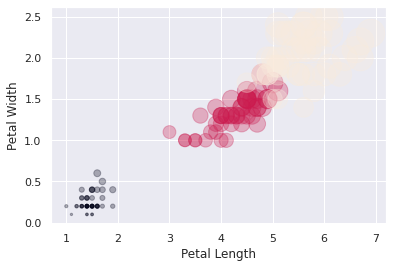

In [ ]:
# Load the Iris dataset
df = sns.load_dataset('iris')
df['species'] = df['species'].map({'setosa': 0, "versicolor": 1,
"virginica": 2})
# Create bubble plot
plt.scatter(df.petal_length, df.petal_width, s=50*df.petal_length*df.petal_width, c=df.species, alpha=0.3 )
# Create labels for axises
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

We can clearly see three different clusters, which clearly indicates
for each specific species or cluster there is a relationship between Petal Length and Petal
Width.

####2.5 Area plot and stacked plot

The stacked plot owes its name to the fact that it represents the area under a line plot and that several such plots can be stacked on top of one another, giving the feeling of a stack. 

The stacked plot can be useful when we want to visualize the cumulative effect of multiple variables being plotted on the y axis.

In [ ]:
# House loan Mortgage cost per month for a year
houseLoanMortgage = [9000, 9000, 8000, 9000, 8000, 9000, 9000, 9000, 9000, 8000, 9000, 9000]

# Utilities Bills for a year
utilitiesBills = [4218, 4218, 4218, 4218, 4218, 4218, 4219, 2218, 3218, 4233, 3000, 3000]

# Transportation bill for a year
transportation = [782, 900, 732, 892, 334, 222, 300, 800, 900, 582, 596, 222]

# Car mortgage cost for one year
carMortgage = [700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711]



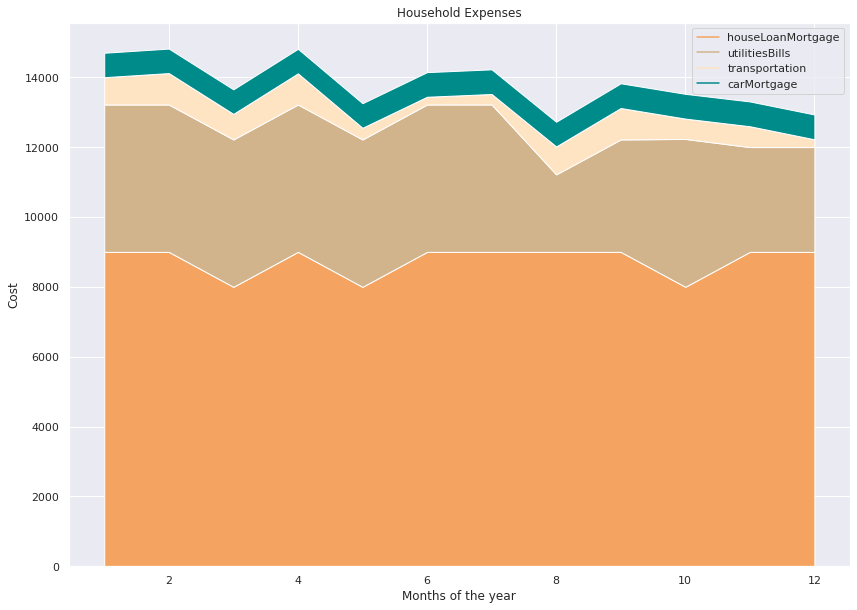

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
months= [x for x in range(1,13)]
# Create placeholders for plot and add required color 
plt.plot([],[], color='sandybrown', label='houseLoanMortgage')
plt.plot([],[], color='tan', label='utilitiesBills')
plt.plot([],[], color='bisque', label='transportation')
plt.plot([],[], color='darkcyan', label='carMortgage')
# Add stacks to the plot
plt.stackplot(
    months, 
    houseLoanMortgage, 
    utilitiesBills, 
    transportation, 
    carMortgage, 
    colors=['sandybrown', 'tan', 'bisque', 'darkcyan']
    )
plt.legend()
# Add Labels
plt.title('Household Expenses')
plt.xlabel('Months of the year')
plt.ylabel('Cost')
# Display on the screen
plt.show()

Now the most important part is the ability to interpret the graph. In the preceding graph, it is clear that the house mortgage loan is the largest expense since the area under the curve for the house mortgage loan is the largest. Secondly, the area of utility bills stack covers the second-largest area, and so on. The graph clearly disseminates meaningful information to the targeted audience. Labels, legends, and colors are important aspects of creating a meaningful visualization. 

####2.6 Pie Chart

In [ ]:
import pandas as pd

# Create URL to JSON file (alternatively this can be a filepath)
url='https://drive.google.com/uc?id=15wAVTvNPY_8bDUtI-QplZ1y22O78SvxV'
# Load the first sheet of the JSON file into a data frame
characters = pd.read_csv(url, index_col='type')

characters


,amount
type,
Bug,45
Dark,16
Dragon,12
Electric,7
Fighting,3
Fire,14
Ghost,10
Grass,31
Ground,17


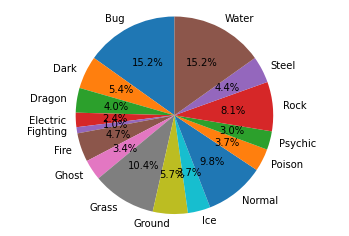

In [ ]:
import matplotlib.pyplot as plt

plt.pie(characters['amount'], labels=characters.index, shadow=False, startangle=90, autopct='%1.1f%%',)
plt.axis('equal') 
plt.show()


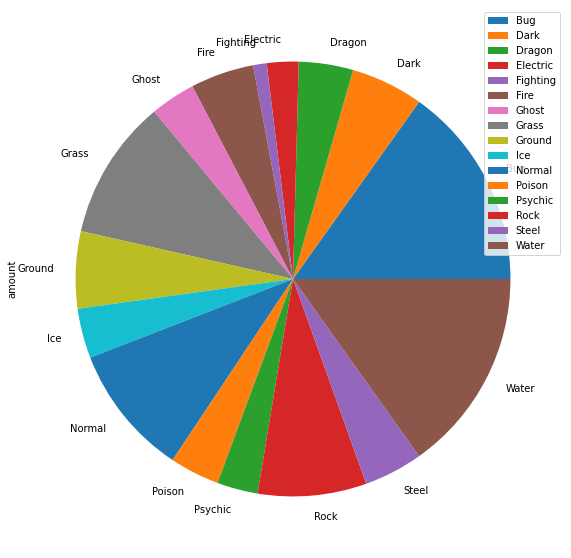

In [ ]:
#You can directly use the pandas library to create a pie chart
characters.plot.pie(y="amount", figsize=(20, 10))

####2.7 Histogram

Histogram plots are used to depict the distribution of any continuous variable. These types
of plots are very popular in statistical analysis.

Consider the following use cases. A survey created in vocational training sessions of
developers had 100 participants. They had several years of Python programming
experience ranging from 0 to 20.

In [ ]:
#import libraries 
import numpy as np
import matplotlib.pyplot as plt

# 1. Create data set
yearsOfExperience = np.array([10, 16, 14,  5, 10, 11, 16, 14,  3, 14, 13, 19,  2,  5,  7,  3, 20,
       11, 11, 14,  2, 20, 15, 11,  1, 15, 15, 15,  2,  9, 18,  1, 17, 18,
       13,  9, 20, 13, 17, 13, 15, 17, 10,  2, 11,  8,  5, 19,  2,  4,  9,
       17, 16, 13, 18,  5,  7, 18, 15, 20,  2,  7,  0,  4, 14,  1, 14, 18,
        8, 11, 12,  2,  9,  7, 11,  2,  6, 15,  2, 14, 13,  4,  6, 15,  3,
        6, 10,  2, 11,  0, 18,  0, 13, 16, 18,  5, 14,  7, 14, 18])
yearsOfExperience

array([10, 16, 14,  5, 10, 11, 16, 14,  3, 14, 13, 19,  2,  5,  7,  3, 20,
       11, 11, 14,  2, 20, 15, 11,  1, 15, 15, 15,  2,  9, 18,  1, 17, 18,
       13,  9, 20, 13, 17, 13, 15, 17, 10,  2, 11,  8,  5, 19,  2,  4,  9,
       17, 16, 13, 18,  5,  7, 18, 15, 20,  2,  7,  0,  4, 14,  1, 14, 18,
        8, 11, 12,  2,  9,  7, 11,  2,  6, 15,  2, 14, 13,  4,  6, 15,  3,
        6, 10,  2, 11,  0, 18,  0, 13, 16, 18,  5, 14,  7, 14, 18])

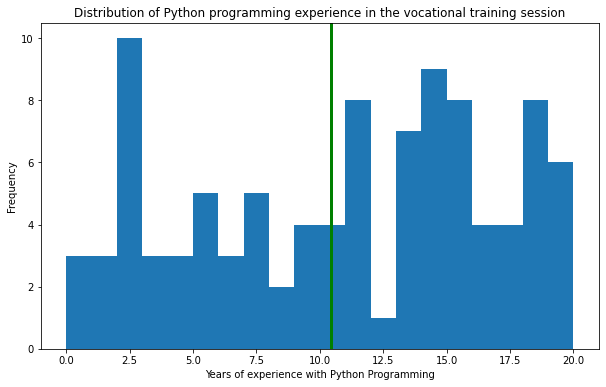

In [ ]:
plt.figure(figsize = (10,6))

# 2. Plot the distribution of group experience
nbins = 20
n, bins, patches = plt.hist(yearsOfExperience, bins=nbins)

# 3. Add labels to the axis and title
plt.xlabel("Years of experience with Python Programming")
plt.ylabel("Frequency")
plt.title("Distribution of Python programming experience in the vocational training session")

# 4. Draw a green vertical line in the graph at the average experience:
plt.axvline(x=yearsOfExperience.mean(), linewidth=3, color = 'g') 

# 5. Display the plot 
plt.show()


Now, from the graph, we can say that the average experience of the
participants is around 10 years. 

Can we improve the graph for better readability? How
about we try to plot the percentage of the sum of all the entries in yearsOfExperience? In
addition to that, we can also plot a normal distribution using the mean and standard
deviation of this data to see the distribution pattern. 

In a nutshell, the normal distribution is also referred to as the
Gaussian distribution. The term indicates a probability distribution that is symmetrical
about the mean, illustrating that data near the average (mean) is more frequent than data
far from the mean. 

To plot the distribution, we can add a density=1 parameter in the plot.hist function.
Let's go through the code. Note that there are changes in steps 1, 4, 5, and 6. The rest of the
code is the same as the preceding example:

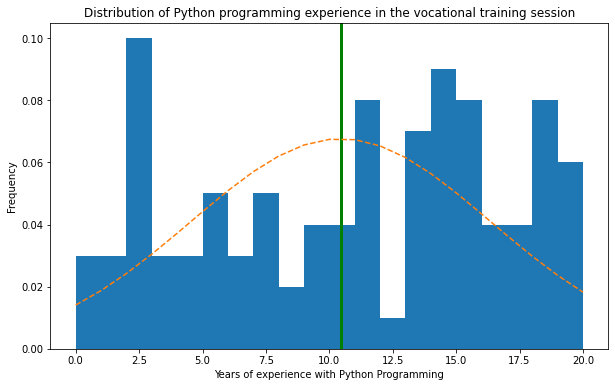

In [ ]:
plt.figure(figsize = (10,6))

# 2. Plot the distribution of group experience
nbins = 20
n, bins, patches = plt.hist(yearsOfExperience, bins=nbins, density=1)

# 3. Add labels to the axis and title
plt.xlabel("Years of experience with Python Programming")
plt.ylabel("Frequency")
plt.title("Distribution of Python programming experience in the vocational training session")

# 4. Draw a green vertical line in the graph at the average experience:
plt.axvline(x=yearsOfExperience.mean(), linewidth=3, color = 'g') 

# 5. Compute mean and standard deviation of the dataset.
mu = yearsOfExperience.mean()
sigma = yearsOfExperience.std()

# 6. Adding a best-fit line for normal distribution. 
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

# 7. Plot the normal distribution
plt.plot(bins, y, '--')

# 8. Display the plot 
plt.show()



####2.8 Lollipop chart
A lollipop chart can be used to display ranking in the data. It is similar to an ordered bar
chart. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


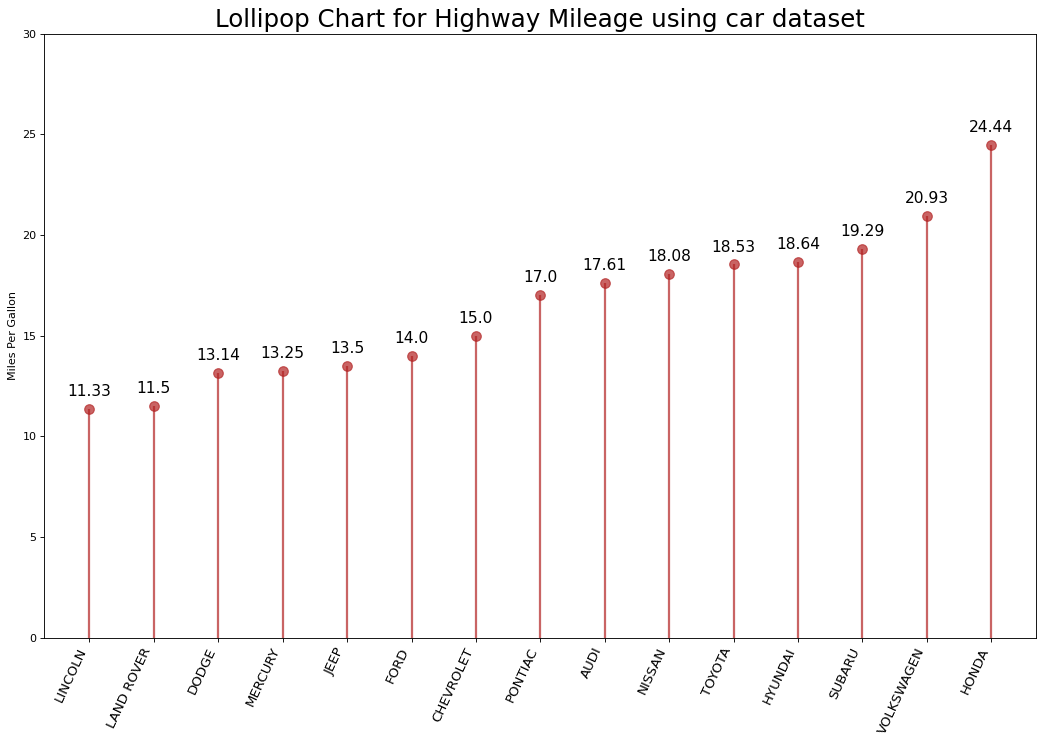

In [ ]:
#Read the dataset
carDF = pd.read_csv("https://drive.google.com/uc?id=1gCYxGcnVKDk29zZwlrSKkkOv-n9OsxOI")

#Group by manufacturer and take average mileage
processedDF = carDF[['cty','manufacturer']].groupby('manufacturer').apply(lambda
x: x.mean())

#Sort the values by cty and reset index
processedDF.sort_values('cty', inplace=True)
processedDF.reset_index(inplace=True)

#Plot the graph
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=processedDF.index, ymin=0, ymax=processedDF.cty,
color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=processedDF.index, y=processedDF.cty, s=75,
color='firebrick', alpha=0.7)

#Annotate Title
ax.set_title('Lollipop Chart for Highway Mileage using car dataset', fontdict={'size':22})

#Annotate labels, xticks, and ylims:
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(processedDF.index)
ax.set_xticklabels(processedDF.manufacturer.str.upper(),
rotation=65, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 30)

#Write the values in the plot
for row in processedDF.itertuples():
 ax.text(
    row.Index,
    row.cty+.5,
    s=round(row.cty, 2),
    horizontalalignment= 'center',
    verticalalignment='bottom',
    fontsize=14
    )
#Display the plot on the screen
plt.show()


###Choosing the Best Chart
There is no standard that defines which chart you should choose to visualize your data. However, there are some guidelines that can help you. Here are some of them: 

1. As mentioned with each of the preceding charts that we have seen, it is important to understand what type of data you have. If you have continuous variables, then a histogram would be a good choice. Similarly, if you want to show ranking, an ordered bar chart would be a good choice.
2. Choose the chart that effectively conveys the right and relevant meaning of the data without actually distorting the facts. 
3. Simplicity is best. It is considered better to draw a simple chart that is comprehensible than to draw sophisticated ones that require several reports and texts in order to understand them.
4. Choose a diagram that does not overload the audience with information. Our purpose should be to illustrate abstract information in a clear way.

##2.9 Exercises

####Exercise 1: Read Total profit of all months and show it using a line plot

* X label name = Month Number
* Y label name = Total profit



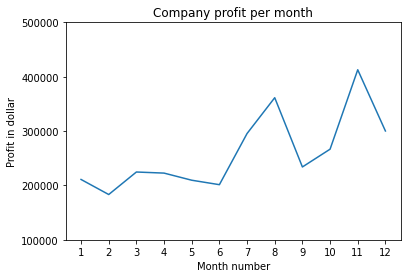

In [ ]:
"""
Import required libraries
Read Data from "https://drive.google.com/uc?id=1IPOL_2zL5xwCJt8QmHv8Hzp8DhNdliQs"
"""
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://drive.google.com/uc?id=1IPOL_2zL5xwCJt8QmHv8Hzp8DhNdliQs")

profitList = df ['total_profit'].tolist()
monthList  = df ['month_number'].tolist()
plt.plot(monthList, profitList, label = 'Month-wise Profit data of last year')
plt.xlabel('Month number')
plt.ylabel('Profit in dollar')
plt.xticks(monthList)
plt.title('Company profit per month')
plt.yticks([100000, 200000, 300000, 400000, 500000])
plt.show()

####Exercise 2: Get total profit of all months and show line plot with the following Style properties

Generated line plot must include following Style properties: –

* Line Style dotted and Line-color should be red
* Show legend at the lower right location.
* X label name = Month Number
* Y label name = Sold units number
* Add a circle marker.
* Line marker color as read
* Line width should be 3

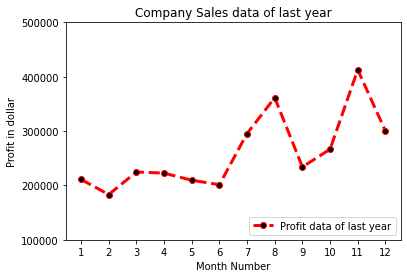

In [ ]:
profitList = df ['total_profit'].tolist()
monthList  = df ['month_number'].tolist()

plt.plot(monthList, profitList, label = 'Profit data of last year', 
      color='r', marker='o', markerfacecolor='k', 
      linestyle='--', linewidth=3)
      
plt.xlabel('Month Number')
plt.ylabel('Profit in dollar')
plt.legend(loc='lower right')
plt.title('Company Sales data of last year')
plt.xticks(monthList)
plt.yticks([100000, 200000, 300000, 400000, 500000])
plt.show()

####**Exercise 3: Read all product sales data and show it  using a multiline plot**

* Display the number of units sold per month for each product using multiline plots. 

(i.e., Separate Plotline for each product ).

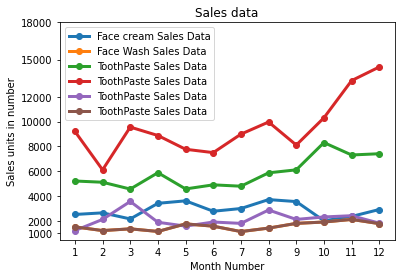

In [ ]:
monthList  = df ['month_number'].tolist()
faceCremSalesData   = df ['facecream'].tolist()
faceWashSalesData   = df ['facewash'].tolist()
toothPasteSalesData = df ['toothpaste'].tolist()
bathingsoapSalesData   = df ['bathingsoap'].tolist()
shampooSalesData   = df ['shampoo'].tolist()
moisturizerSalesData = df ['moisturizer'].tolist()

plt.plot(monthList, faceCremSalesData,   label = 'Face cream Sales Data', marker='o', linewidth=3)
plt.plot(monthList, faceWashSalesData,   label = 'Face Wash Sales Data',  marker='o', linewidth=3)
plt.plot(monthList, toothPasteSalesData, label = 'ToothPaste Sales Data', marker='o', linewidth=3)
plt.plot(monthList, bathingsoapSalesData, label = 'ToothPaste Sales Data', marker='o', linewidth=3)
plt.plot(monthList, shampooSalesData, label = 'ToothPaste Sales Data', marker='o', linewidth=3)
plt.plot(monthList, moisturizerSalesData, label = 'ToothPaste Sales Data', marker='o', linewidth=3)

plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.legend(loc='upper left')
plt.xticks(monthList)
plt.yticks([1000, 2000, 4000, 6000, 8000, 10000, 12000, 15000, 18000])
plt.title('Sales data')
plt.show()

###Exercise 4: Toothpaste Sales Monthly
* Read toothpaste sales data of each month and show it using a scatter plot

* Add a grid in the plot. gridline style should “–“.

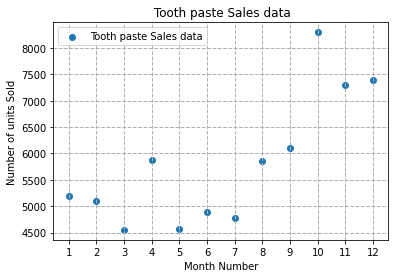

In [ ]:
monthList  = df ['month_number'].tolist()
toothPasteSalesData = df ['toothpaste'].tolist()
plt.scatter(monthList, toothPasteSalesData, label = 'Tooth paste Sales data')
plt.xlabel('Month Number')
plt.ylabel('Number of units Sold')
plt.legend(loc='upper left')
plt.title(' Tooth paste Sales data')
plt.xticks(monthList)
plt.grid(True, linewidth= 1, linestyle="--")
plt.show()

###Exercise 5: Read face cream and facewash product sales data and show it using the bar chart

* The bar chart should display the number of units sold per month for each product. 
* Add a separate bar for each product in the same chart.

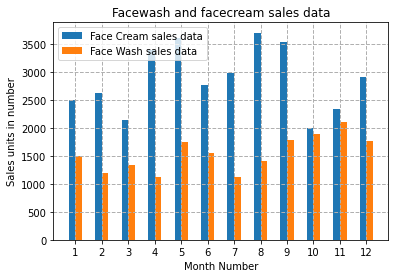

In [ ]:
monthList  = df ['month_number'].tolist()
faceCremSalesData   = df ['facecream'].tolist()
faceWashSalesData   = df ['facewash'].tolist()

plt.bar([a-0.25 for a in monthList], faceCremSalesData, width= 0.25, label = 'Face Cream sales data', align='edge')
plt.bar([a+0.25 for a in monthList], faceWashSalesData, width= -0.25, label = 'Face Wash sales data', align='edge')
plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.legend(loc='upper left')
plt.title(' Sales data')

plt.xticks(monthList)
plt.grid(True, linewidth= 1, linestyle="--")
plt.title('Facewash and facecream sales data')
plt.show()

###Exercise 6: Read sales data of bathing soap of all months and show it using a bar chart.

Save this plot to your hard disk

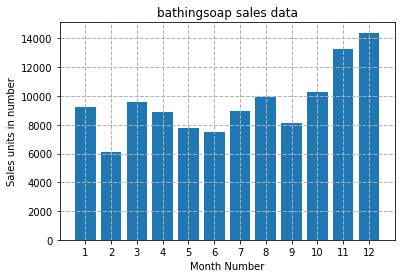

In [ ]:
monthList  = df ['month_number'].tolist()
bathingsoapSalesData   = df ['bathingsoap'].tolist()
plt.bar(monthList, bathingsoapSalesData)
plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.title(' Sales data')
plt.xticks(monthList)
plt.grid(True, linewidth= 1, linestyle="--")
plt.title('bathingsoap sales data')
plt.savefig('sales_data_of_bathingsoap.png', dpi=150)
plt.show()

###Exercise 7: Read the total profit of each month and show it using the histogram to see the most common profit ranges.

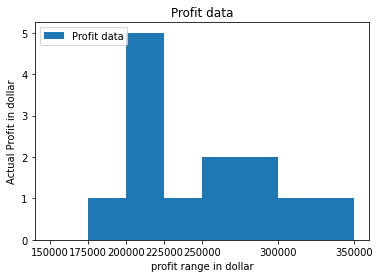

In [ ]:
profitList = df ['total_profit'].tolist()
labels = ['low', 'average', 'Good', 'Best']
profit_range = [150000, 175000, 200000, 225000, 250000, 300000, 350000]
plt.hist(profitList, profit_range, label = 'Profit data')
plt.xlabel('profit range in dollar')
plt.ylabel('Actual Profit in dollar')
plt.legend(loc='upper left')
plt.xticks(profit_range)
plt.title('Profit data')
plt.show()

###Exercise 8: Calculate total sale data for last year for each product and show it using a Pie chart

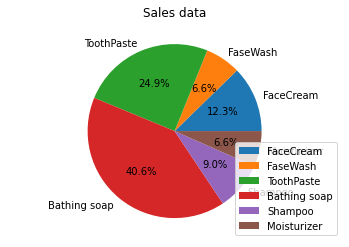

In [ ]:
monthList  = df ['month_number'].tolist()

labels = ['FaceCream', 'FaseWash', 'ToothPaste', 'Bathing soap', 'Shampoo', 'Moisturizer']
salesData   = [df ['facecream'].sum(), df ['facewash'].sum(), df ['toothpaste'].sum(), 
         df ['bathingsoap'].sum(), df ['shampoo'].sum(), df ['moisturizer'].sum()]
plt.axis("equal")
plt.pie(salesData, labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower right')
plt.title('Sales data')
plt.show()

###Exercise 9: Read Bathing soap facewash of all months and display it using the Subplot

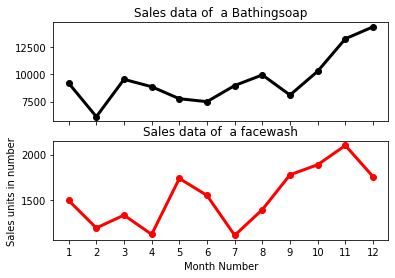

In [ ]:
monthList  = df ['month_number'].tolist()
bathingsoap   = df ['bathingsoap'].tolist()
faceWashSalesData   = df ['facewash'].tolist()

f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(monthList, bathingsoap, label = 'Bathingsoap Sales Data', color='k', marker='o', linewidth=3)
axarr[0].set_title('Sales data of  a Bathingsoap')
axarr[1].plot(monthList, faceWashSalesData, label = 'Face Wash Sales Data', color='r', marker='o', linewidth=3)
axarr[1].set_title('Sales data of  a facewash')

plt.xticks(monthList)
plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.show()

###Exercise 10: Read all product sales data and show it using the stack plot


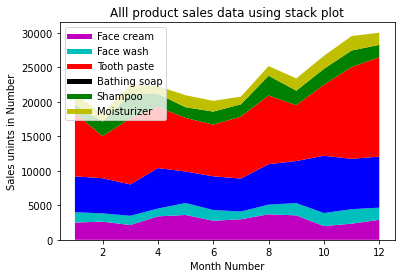

In [ ]:
monthList  = df ['month_number'].tolist()

faceCremSalesData   = df ['facecream'].tolist()
faceWashSalesData   = df ['facewash'].tolist()
toothPasteSalesData = df ['toothpaste'].tolist()
bathingsoapSalesData   = df ['bathingsoap'].tolist()
shampooSalesData   = df ['shampoo'].tolist()
moisturizerSalesData = df ['moisturizer'].tolist()

plt.plot([],[],color='m', label='face Cream', linewidth=5)
plt.plot([],[],color='c', label='Face wash', linewidth=5)
plt.plot([],[],color='r', label='Tooth paste', linewidth=5)
plt.plot([],[],color='k', label='Bathing soap', linewidth=5)
plt.plot([],[],color='g', label='Shampoo', linewidth=5)
plt.plot([],[],color='y', label='Moisturizer', linewidth=5)

plt.stackplot(monthList, faceCremSalesData, faceWashSalesData, toothPasteSalesData, 
              bathingsoapSalesData, shampooSalesData, moisturizerSalesData, 
              colors=['m','c','o','k','g','y'])

plt.xlabel('Month Number')
plt.ylabel('Sales unints in Number')
plt.title('Alll product sales data using stack plot')
plt.legend(loc='upper left')
plt.show()

###Exercise 11: Build a Table & Polar Chart


####Table Chart of Number of LED Bulbs Sold

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Years under consideration
years = ["2010", "2011", "2012", "2013", "2014"]

# Available watt
columns = ['4.5W', '6.0W', '7.0W','8.5W','9.5W','13.5W','15W']
unitsSold = [
             [65, 141, 88, 111, 104, 71, 99],
             [85, 142, 89, 112, 103, 73, 98],
             [75, 143, 90, 113, 89, 75, 93],
             [65, 144, 91, 114, 90, 77, 92],
             [55, 145, 92, 115, 88, 79, 93],
            ]

# Define the range and scale for the y axis
values = np.arange(0, 600, 100)

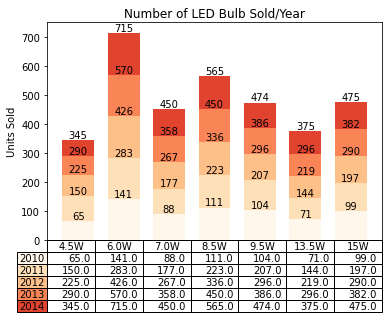

In [ ]:
colors = plt.cm.OrRd(np.linspace(0, 0.7, len(years)))
index = np.arange(len(columns)) + 0.3
bar_width = 0.7

y_offset = np.zeros(len(columns))
fig, ax = plt.subplots()

cell_text = []

n_rows = len(unitsSold)
for row in range(n_rows):
    plot = plt.bar(index, unitsSold[row], bar_width, bottom=y_offset, 
                   color=colors[row])
    y_offset = y_offset + unitsSold[row]
    cell_text.append(['%1.1f' % (x) for x in y_offset])
    i=0
# Each iteration of this for loop, labels each bar with corresponding value for the given year
    for rect in plot:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, y_offset[i],'%d' 
                % int(y_offset[i]), 
                ha='center', va='bottom')
        i = i+1 

# Add a table to the bottom of the axes
the_table = plt.table(cellText=cell_text, rowLabels=years, 
                rowColours=colors, colLabels=columns, loc='bottom')
plt.ylabel("Units Sold")
plt.xticks([])
plt.title('Number of LED Bulb Sold/Year')
plt.show()

####Polar Chart of Academic Grades

In [ ]:
# Let us assume you have 5 courses in your academic year. 
subjects = ["C programming", "Numerical methods", "Operating system", "DBMS", "Computer Networks"]

# And you planned to obtained following grades in each subject
plannedGrade = [90, 95, 92, 68, 68, 90]

# However, after your final examination, this is the grade you got
actualGrade = [75, 89, 89, 80, 80, 75]

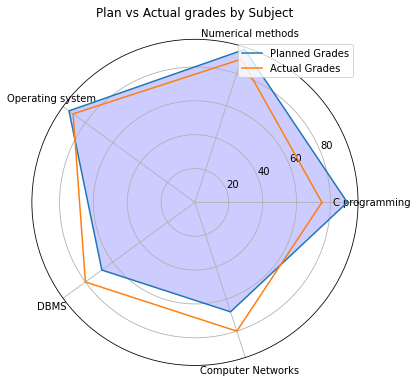

In [ ]:
# 1. Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# 2. Prepare the data set. 
# 3. Set up theta

theta = np.linspace(0, 2 * np.pi, len(plannedGrade))

# 4. Initialize the plot by figure size and polar projection
plt.figure(figsize = (10,6))
plt.subplot(polar=True)

# 5. Get the grid lines to align with each of the subject names.
(lines,labels) = plt.thetagrids(range(0,360, int(360/len(subjects))),
                                                (subjects))

# 6. We use plot method to plot the graph. And fill the area under it. 
plt.plot(theta, plannedGrade)
plt.fill(theta, plannedGrade, 'b', alpha=0.2)

# 7. Now, we plot the actual grade obtained
plt.plot(theta, actualGrade)

# 8. Finally, we add a legend and a nice comprehensible title to the plot. 
plt.legend(labels=('Planned Grades','Actual Grades'),loc=1)
plt.title("Plan vs Actual grades by Subject")

# 9. Lastly, we show the plot on the screen. 
plt.show()